In [92]:
'''
·     CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's
'''

"\n·     CRIM - per capita crime rate by town\n\n·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.\n\n·      INDUS - proportion of non-retail business acres per town.\n\n·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\n\n·      NOX - nitric oxides concentration (parts per 10 million)\n\n·      RM - average number of rooms per dwelling\n\n·      AGE - proportion of owner-occupied units built prior to 1940\n\n·      DIS - weighted distances to five Boston employment centres\n\n·      RAD - index of accessibility to radial highways\n\n·      TAX - full-value property-tax rate per $10,000\n\n·      PTRATIO - pupil-teacher ratio by town\n\n·      LSTAT - % lower status of the population\n\n·      MEDV - Median value of owner-occupied homes in $1000's\n"

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [94]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [95]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [96]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [97]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


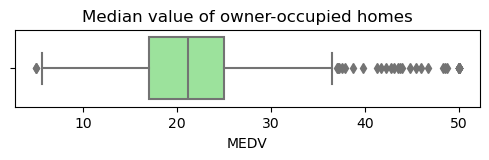

In [98]:
#For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(6,1))
ax=sns.boxplot(x="MEDV",data=boston_df,color='lightgreen') 
plt.title("Median value of owner-occupied homes")
plt.show()

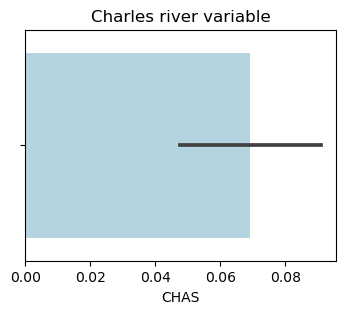

In [99]:
#Provide a  bar plot for the Charles river variable
plt.figure(figsize=(4,3))
ax=sns.barplot(x="CHAS",data=boston_df,color='lightblue')
plt.title("Charles river variable")
plt.show()

In [100]:
boston_df.loc[(boston_df["AGE"] <= 35),'grouped_age'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'grouped_age'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'grouped_age'] = '70 years and older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,grouped_age
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


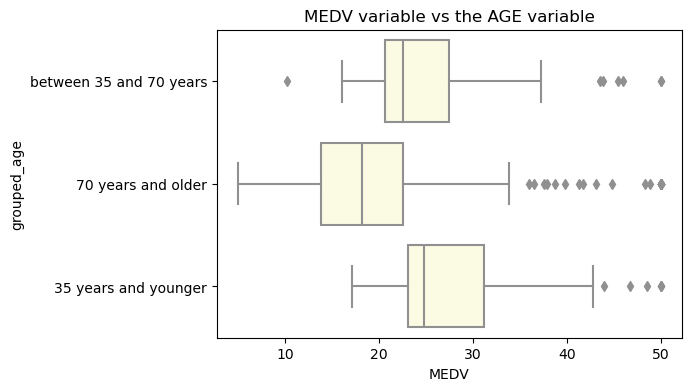

In [101]:
#Provide a boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(6,4))
ax=sns.boxplot(x="MEDV",y="grouped_age",data=boston_df,color='lightyellow') 
plt.title("MEDV variable vs the AGE variable")
plt.show()

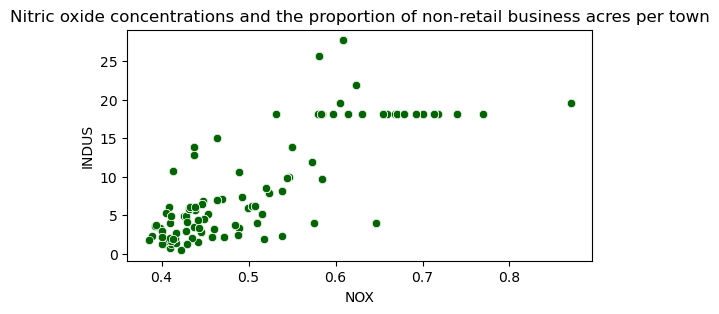

In [102]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
plt.figure(figsize=(6,3))
ax=sns.scatterplot(x="NOX",y="INDUS",data=boston_df,color='darkgreen') 
plt.title("Nitric oxide concentrations and the proportion of non-retail business acres per town")
plt.show()

C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


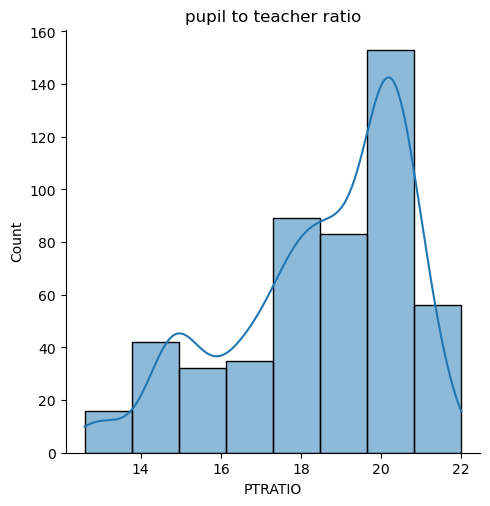

In [103]:
#Create a histogram for the pupil to teacher ratio variable
ax=sns.displot(data=boston_df.PTRATIO,bins=8, kde=True) 
plt.title("pupil to teacher ratio")
plt.show()

In [104]:
boston_df["CHAS"].value_counts()

CHAS
0.0    471
1.0     35
Name: count, dtype: int64

In [105]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [106]:
##NULL HYPOTHESIS: H0: THE MEDIAN VALUES OF HOUSES BOUNDED BY CHARLES RIVER IS NOT SAME
##ALTERNATE HYPOTHESIS: H1: THE MEDIAN VALUES OF HOUSES BOUNDED BY CHARLES RIVER IS SAME

In [107]:
a = boston_df[boston_df["CHAS"]==0]["MEDV"]
b = boston_df[boston_df["CHAS"]==1]["MEDV"]

In [108]:
scipy.stats.ttest_ind(a,b,axis=0,equal_var=True)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

In [109]:
#pvalue is more than 0.05 so donot reject null hypothesis so the median values are NOT SAME

In [110]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [111]:
##NULL HYPOTHESIS: H0: THERE IS NO DIFFERENCE IN MEDIAN VALUES OF HOUSES FOR EACH PROPORTION OF OWNER 
##ALTERNATE HYPOTHESIS: H1: THERE IS A SIGNIFICANT DIFFERENCE IN MEDIAN VALUES OF HOUSES FOR EACH PROPORTION OF OWNER 

In [112]:
boston_df.loc[(boston_df["AGE"] <= 35),'grouped_age'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'grouped_age'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'grouped_age'] = '70 years and older'
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,grouped_age
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


In [113]:
a = boston_df[boston_df["grouped_age"]=='35 years and younger']["MEDV"]
b = boston_df[boston_df["grouped_age"]=='between 35 and 70 years']["MEDV"]
c = boston_df[boston_df["grouped_age"]=='70 years and older']["MEDV"]

In [114]:
f_stats, p_value = scipy.stats.f_oneway(a,b,c,axis=0)
print("F-Static:", f_stats)
print("P-Value:",  p_value)

F-Static: 36.40764999196599
P-Value: 1.7105011022702984e-15


In [115]:
#pvalue>0.05 so donot reject null hypothesis thus,there is NO DIFFERENCE IN MEDIAN VALUES OF HOUSES FOR EACH PROPORTION OF OWNER 

In [116]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [117]:
##NULL HYPOTHESIS: H0: THERE IS NO RELATIONSHIP BETWEEN NO2 AND NON RETAIL BUSINESS ACRES PER TOWN
##ALTERNATE HYPOTHESIS: H1: THERE IS A RELATIONSHIP BETWEEN NO2 AND NON RETAIL BUSINESS ACRES PER TOWN

In [118]:
pearson,p_value = scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])
print("pearson coeff value:", pearson)
print("P-Value:",  p_value)

pearson coeff value: 0.7636514469209149
P-Value: 7.913361061242812e-98


In [119]:
#pvalue<0.05, we reject the Null hypothesis thus there exists a relationship between NO2 and non-retail business acres per town.

In [120]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [121]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [122]:
x = sm.add_constant(x)

In [123]:
results = sm.OLS(y,x).fit()

In [124]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        22:38:37   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""